K-Means Silhouette Score: 0.661
EM (GMM) Silhouette Score: 0.468

✅ K-Means performs better.


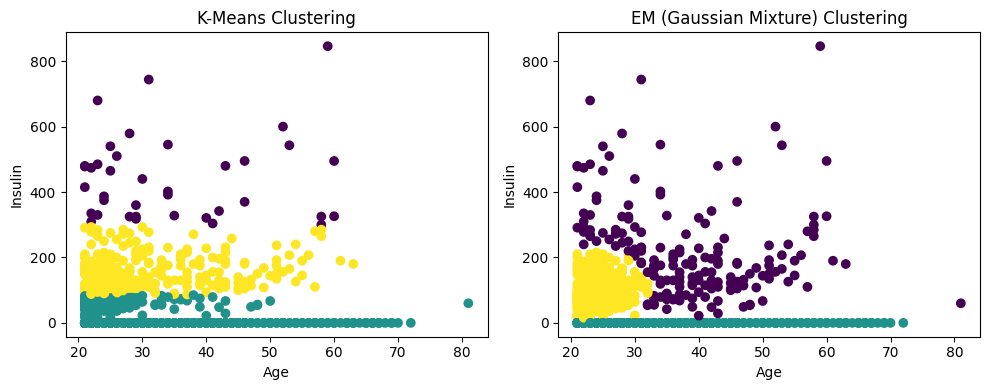


Cluster 1 — Avg(Age): 34.8, Avg(Insulin): 441.3
  → Suggested Treatment: Intensive insulin therapy + regular monitoring

Cluster 2 — Avg(Age): 33.9, Avg(Insulin): 13.4
  → Suggested Treatment: Regular health check-up only

Cluster 3 — Avg(Age): 31.7, Avg(Insulin): 157.0
  → Suggested Treatment: Intensive insulin therapy + regular monitoring


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# --- Load dataset ---
data = pd.read_csv("patient_data1.csv")
X = data[['Age', 'Insulin']]

# --- K-Means ---
kmeans = KMeans(n_clusters=3, random_state=42)
k_labels = kmeans.fit_predict(X)
k_score = silhouette_score(X, k_labels)

# --- EM (Gaussian Mixture Model) ---
gmm = GaussianMixture(n_components=3, random_state=42)
g_labels = gmm.fit_predict(X)
g_score = silhouette_score(X, g_labels)

# --- Compare and Display Results ---
print(f"K-Means Silhouette Score: {k_score:.3f}")
print(f"EM (GMM) Silhouette Score: {g_score:.3f}")

if g_score > k_score:
    print("\n✅ EM (Gaussian Mixture) performs better.")
    data['Cluster'] = g_labels
else:
    print("\n✅ K-Means performs better.")
    data['Cluster'] = k_labels

# --- Visualisation ---
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].scatter(data['Age'], data['Insulin'], c=k_labels, cmap='viridis')
axes[0].set_title("K-Means Clustering")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Insulin")

axes[1].scatter(data['Age'], data['Insulin'], c=g_labels, cmap='viridis')
axes[1].set_title("EM (Gaussian Mixture) Clustering")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Insulin")

plt.tight_layout()
plt.show()

# --- Treatment Plan based on Clusters ---
for c in range(3):
    group = data[data['Cluster'] == c]
    avg_age = group['Age'].mean()
    avg_insulin = group['Insulin'].mean()

    print(f"\nCluster {c+1} — Avg(Age): {avg_age:.1f}, Avg(Insulin): {avg_insulin:.1f}")

    if avg_insulin > 150:
        print("  → Suggested Treatment: Intensive insulin therapy + regular monitoring")
    elif avg_insulin > 100:
        print("  → Suggested Treatment: Moderate medication + diet control")
    else:
        print("  → Suggested Treatment: Regular health check-up only")
